<h1 style = 'text-align: center'> MEGA STORE </h1>

***

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 10

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

import math

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

## Getting Data and Data Inspection 

In [2]:
# Reading Dataset

df = pd.read_csv("MegaStore.csv")

In [3]:
# Checking Dataframe
df.head()

,Item,Itemtype,Weight,FatContent,Visibility,MRP,Outlet,OutletEstablishmentYear,OutletSize,OutletCity,OutletType,Sales
0,FDU28,Frozen Foods,19.2,Regular,0.094450,187.8214,OUT_017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
1,FDY07,Fruits and Vegetables,11.8,Low Fat,0.000000,45.5402,OUT_049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
2,FDA03,Dairy,18.5,Regular,0.045464,144.1102,OUT_046,1997,Small,Tier 1,Supermarket Type1,2187.1530
3,FDX32,Fruits and Vegetables,15.1,Regular,0.100014,145.4786,OUT_049,1999,Medium,Tier 1,Supermarket Type1,1589.2646
4,FDS46,Snack Foods,17.6,Regular,0.047257,119.6782,OUT_046,1997,Small,Tier 1,Supermarket Type1,2145.2076


In [4]:
# ROWS and COLUMNS in Dataframe
df.shape

(8523, 12)

In [5]:
# Checking Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Item                     8523 non-null   object 
 1   Itemtype                 8523 non-null   object 
 2   Weight                   7060 non-null   float64
 3   FatContent               8523 non-null   object 
 4   Visibility               8523 non-null   float64
 5   MRP                      8523 non-null   float64
 6   Outlet                   8523 non-null   object 
 7   OutletEstablishmentYear  8523 non-null   int64  
 8   OutletSize               6113 non-null   object 
 9   OutletCity               8523 non-null   object 
 10  OutletType               8523 non-null   object 
 11  Sales                    8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# Checking for NULL Values in Dataset
df.isnull().sum()

Item                          0
Itemtype                      0
Weight                     1463
FatContent                    0
Visibility                    0
MRP                           0
Outlet                        0
OutletEstablishmentYear       0
OutletSize                 2410
OutletCity                    0
OutletType                    0
Sales                         0
dtype: int64

In [7]:
df.isnull().sum()/df.shape[0]*100

Item                        0.000000
Itemtype                    0.000000
Weight                     17.165317
FatContent                  0.000000
Visibility                  0.000000
MRP                         0.000000
Outlet                      0.000000
OutletEstablishmentYear     0.000000
OutletSize                 28.276428
OutletCity                  0.000000
OutletType                  0.000000
Sales                       0.000000
dtype: float64

* __We have 17% and 28% of missing values in Weight and OutletSize columns respectively.__

In [8]:
#categorical features
categorical = df.select_dtypes(include = [np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= df.select_dtypes(include = [np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 5


In [9]:
df.apply(lambda x : len(x.unique()))

Item                       1559
Itemtype                     16
Weight                      416
FatContent                    5
Visibility                 7880
MRP                        5938
Outlet                       10
OutletEstablishmentYear       9
OutletSize                    4
OutletCity                    3
OutletType                    4
Sales                      3493
dtype: int64

## Data Cleaning

__We have two features with NULL values, first we have to imputes the values for them__

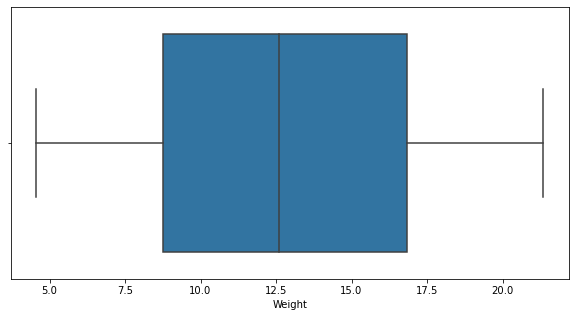

In [10]:
# Checking Outliers in Weight column

plt.figure(figsize = (10, 5))
sns.boxplot('Weight', data = df)
plt.show()

__As there is no outliers in the Weight, we can either use MEAN or MEDIAN to replace NULL values.__

__If we have Outliers, we need to go with MEDIAN__

__So for best practice, for any NUMERIACAL feature you can go with MEDIAN (*BUT THIS TOO DEPEND ON PROBLEM TO PROBLEM*)__

In [11]:
df.Weight.mean()

12.857645184136183

In [12]:
df.Weight.median()

12.6

In [13]:
# Imputing with Median

df.Weight = df.Weight.fillna(df.Weight.median())

In [14]:
df.Weight.isnull().sum()

0

<AxesSubplot:xlabel='OutletSize', ylabel='count'>

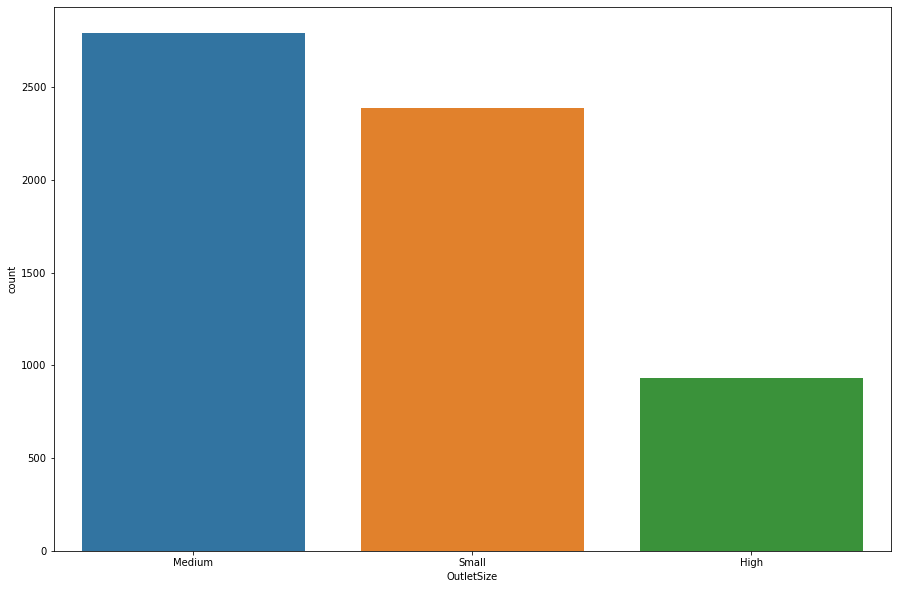

In [15]:
# Checking Categories of OutletSize column

sns.countplot('OutletSize', data = df)

__Here we can see Medium has a greater area in OutletSize, which means it is MODE of OutletSize__

__For any CATEGORICAL Features use MODE to replace NULL Values.__

In [16]:
df.OutletSize.mode()

0    Medium
dtype: object

In [17]:
# Imputing with Mode

df.OutletSize = df.OutletSize.fillna(df.OutletSize.mode()[0])

In [18]:
df.OutletSize.isnull().sum()

0

## DESCRIPTIVE ANALYSIS

In [19]:
df.head()

,Item,Itemtype,Weight,FatContent,Visibility,MRP,Outlet,OutletEstablishmentYear,OutletSize,OutletCity,OutletType,Sales
0,FDU28,Frozen Foods,19.2,Regular,0.094450,187.8214,OUT_017,2007,Medium,Tier 2,Supermarket Type1,4710.5350
1,FDY07,Fruits and Vegetables,11.8,Low Fat,0.000000,45.5402,OUT_049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
2,FDA03,Dairy,18.5,Regular,0.045464,144.1102,OUT_046,1997,Small,Tier 1,Supermarket Type1,2187.1530
3,FDX32,Fruits and Vegetables,15.1,Regular,0.100014,145.4786,OUT_049,1999,Medium,Tier 1,Supermarket Type1,1589.2646
4,FDS46,Snack Foods,17.6,Regular,0.047257,119.6782,OUT_046,1997,Small,Tier 1,Supermarket Type1,2145.2076


In [20]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Weight,8523.0,12.813420,4.227240,4.555,9.310000,12.600000,16.000000,21.350000
Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
OutletEstablishmentYear,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


__THINGS NEED TO CHECK IN DESCRIPTIVE ANALYSE__

1. Count should be equal which means no null values in Dataset
2. Features minimum value
3. Mean and Median (50%) Difference

__As we have noticed here Visibility minimum value is 0, which is Modify Item_Visibility which makes no practical sense. Lets consider it like missing information and impute it with mean visibility of that product.__

In [21]:
df['Visibility'] = df['Visibility'].replace(0, np.nan)
    
df.Visibility = df.Visibility.fillna(df.Visibility.mean())

In [22]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Weight,8523.0,12.813420,4.227240,4.555000,9.310000,12.600000,16.000000,21.350000
Visibility,8523.0,0.070482,0.048730,0.003575,0.033085,0.062517,0.094585,0.328391
MRP,8523.0,140.992782,62.275067,31.290000,93.826500,143.012800,185.643700,266.888400
OutletEstablishmentYear,8523.0,1997.831867,8.371760,1985.000000,1987.000000,1999.000000,2004.000000,2009.000000
Sales,8523.0,2181.288914,1706.499616,33.290000,834.247400,1794.331000,3101.296400,13086.964800


In [23]:
# For CATEGORICAL FEATURES

df.Item.value_counts()

FDG33    10
FDW13    10
NCF42     9
FDW26     9
FDV38     9
         ..
FDY43     1
FDT35     1
DRF48     1
FDN52     1
FDC23     1
Name: Item, Length: 1559, dtype: int64

In [24]:
#ITEM CODE

df.Item.apply(lambda x: x[0:2]).value_counts()

FD    6125
NC    1599
DR     799
Name: Item, dtype: int64

In [25]:
df.Itemtype.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Itemtype, dtype: int64

In [26]:
df.FatContent.value_counts()

Low Fat    5089
Regular    2889
Low         316
reg         117
low fat     112
Name: FatContent, dtype: int64

__Here we can see different Abbr. are using for REGULAR AND LOW FAT Category__

In [27]:
# Make unique Categories by merging 
df.FatContent.replace(['low fat','Low','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [28]:
df.FatContent.unique()

array(['Regular', 'Low Fat'], dtype=object)

In [29]:
df.FatContent.value_counts()

Low Fat    5517
Regular    3006
Name: FatContent, dtype: int64

In [30]:
df.Outlet.value_counts()

OUT_027    935
OUT_013    932
OUT_035    930
OUT_049    930
OUT_046    930
OUT_045    929
OUT_018    928
OUT_017    926
OUT_010    555
OUT_019    528
Name: Outlet, dtype: int64

In [31]:
df.OutletSize.value_counts()

Medium    5203
Small     2388
High       932
Name: OutletSize, dtype: int64

In [32]:
df.OutletCity.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: OutletCity, dtype: int64

In [33]:
df.OutletType.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: OutletType, dtype: int64

In [34]:
df.corr()

,Weight,Visibility,MRP,OutletEstablishmentYear,Sales
Weight,1.000000,-0.020003,0.024951,0.007739,0.009693
Visibility,-0.020003,1.000000,-0.005515,-0.078316,-0.134035
MRP,0.024951,-0.005515,1.000000,0.005020,0.567574
OutletEstablishmentYear,0.007739,-0.078316,0.005020,1.000000,-0.049135
Sales,0.009693,-0.134035,0.567574,-0.049135,1.000000


<AxesSubplot:>

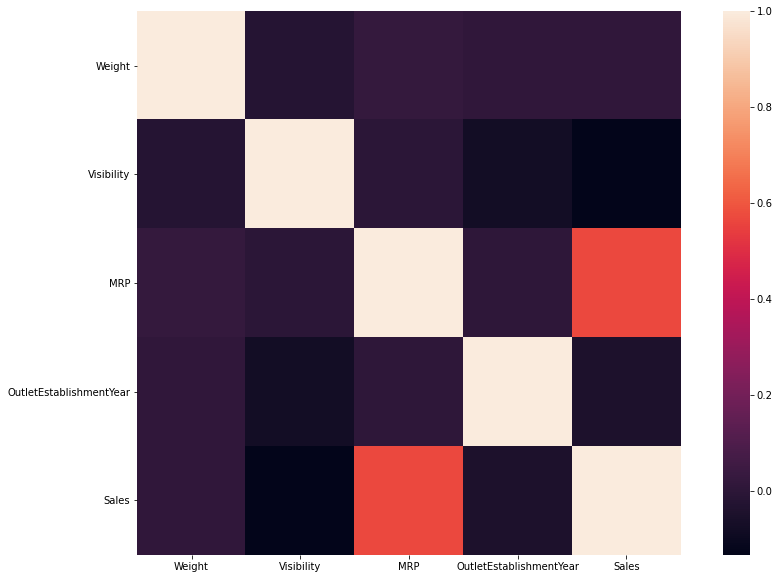

In [35]:
# Correlation matrix

sns.heatmap(df.corr(), square=True)

## Expolatory Data Analyse (EDA)

__For CATEGORICAL FEATURES we have Countplot / Barplot__

In [36]:
#categorical features
for i in categorical:
    print(i)

Item
Itemtype
FatContent
Outlet
OutletSize
OutletCity
OutletType


__What you thing, feature "ITEM" give us some good information?__

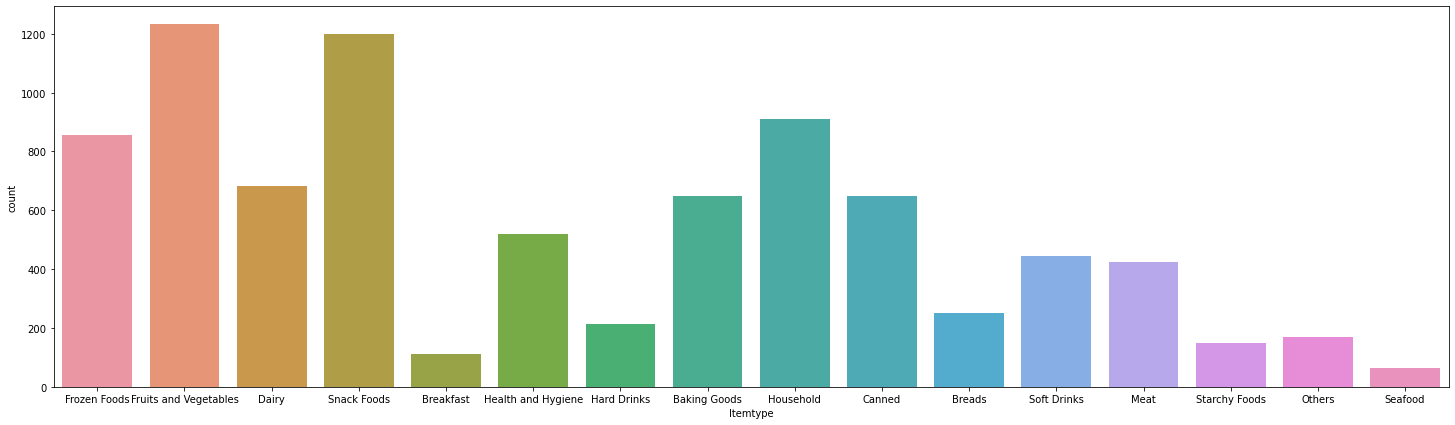

In [37]:
plt.figure(figsize = (25,7))
sns.countplot('Itemtype', data = df)
plt.show()

* __Fruits and Vegetables are largely sold as people tend to use them on daily purpose.__
* __Snack Foods too have good sales.__

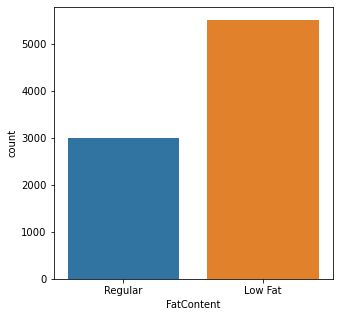

In [38]:
plt.figure(figsize = (5, 5))
sns.countplot('FatContent', data = df)
plt.show()

__The Items bought are more of Low Fat.__

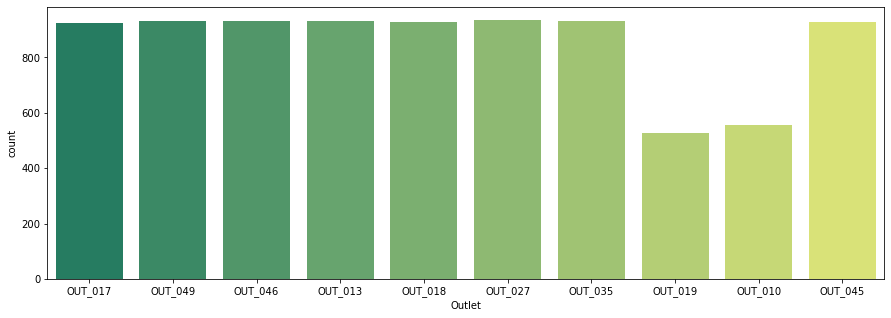

In [39]:
plt.figure(figsize = (15,5))
sns.countplot('Outlet', data = df, palette='summer')
plt.show()

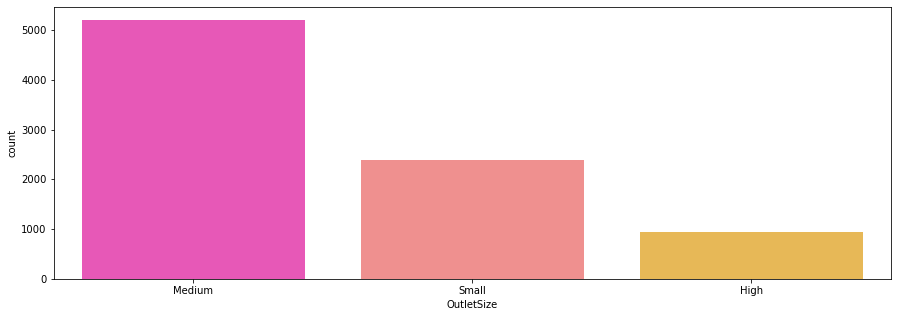

In [40]:
plt.figure(figsize = (15,5))
sns.countplot('OutletSize', data = df, palette='spring')
plt.show()

* __The Outlets are more of Medium Size__

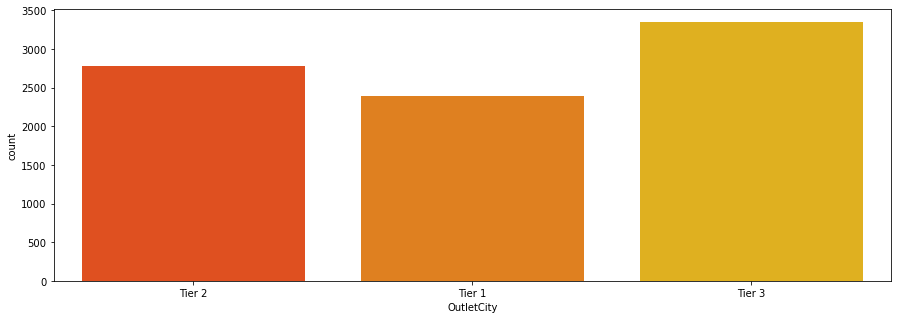

In [41]:
plt.figure(figsize = (15,5))
sns.countplot('OutletCity', data = df, palette='autumn')
plt.show()

* __The Outlets are maximum in number in Tier 3 Cities__

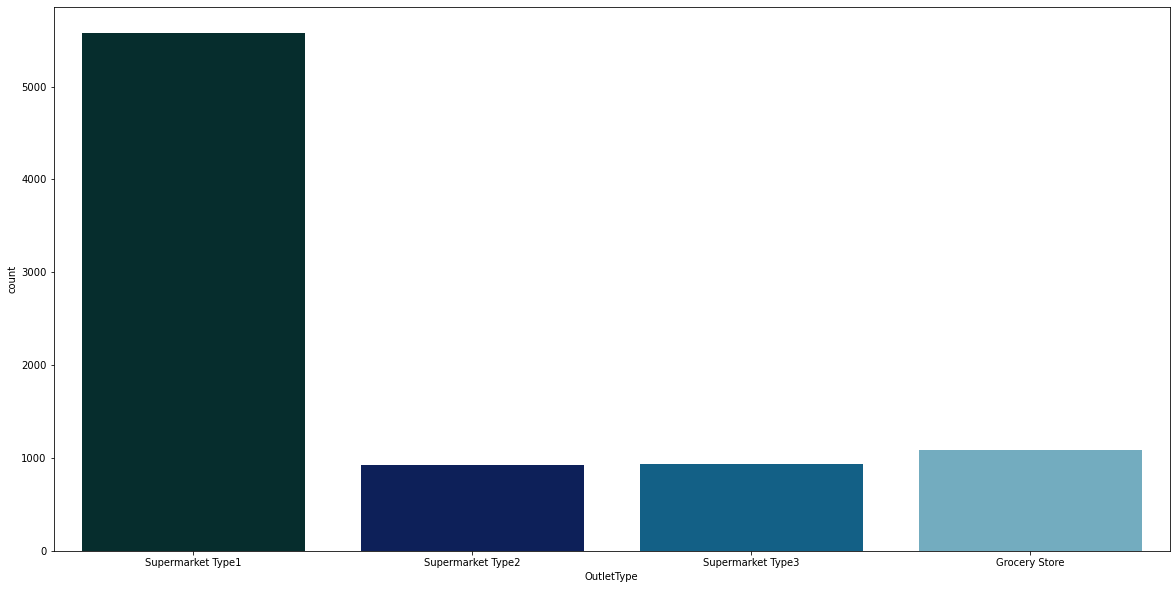

In [42]:
plt.figure(figsize = (20,10))
sns.countplot('OutletType', data = df, palette='ocean')
plt.show()

* __The Outlets are more of Supermarket Type1__

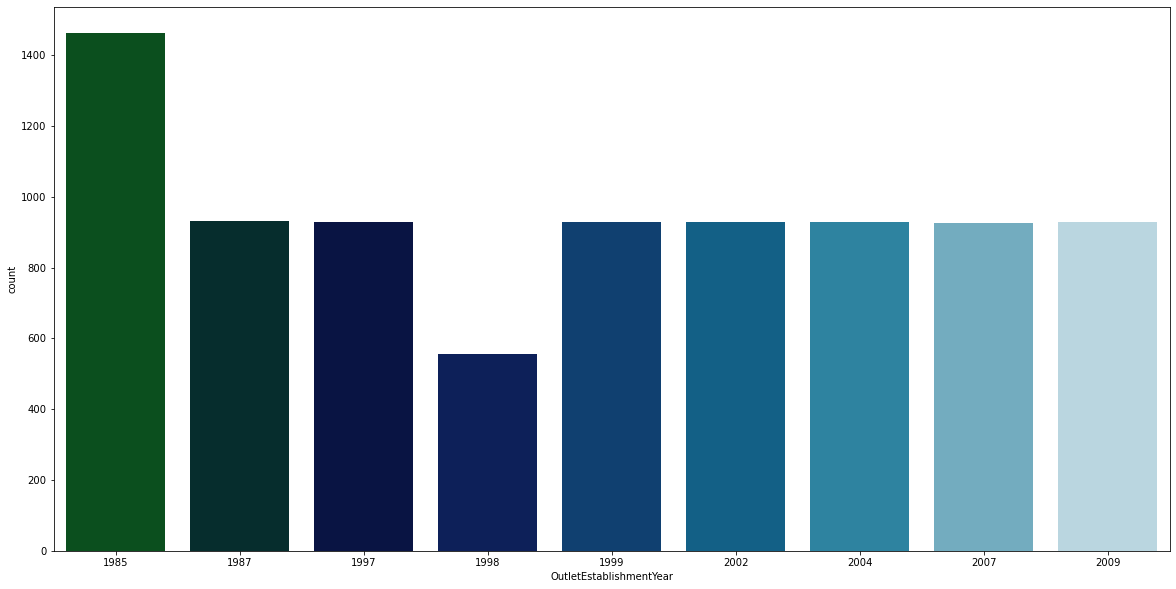

In [43]:
plt.figure(figsize = (20,10))
sns.countplot('OutletEstablishmentYear', data = df, palette='ocean')
plt.show()

<AxesSubplot:xlabel='Sales', ylabel='Itemtype'>

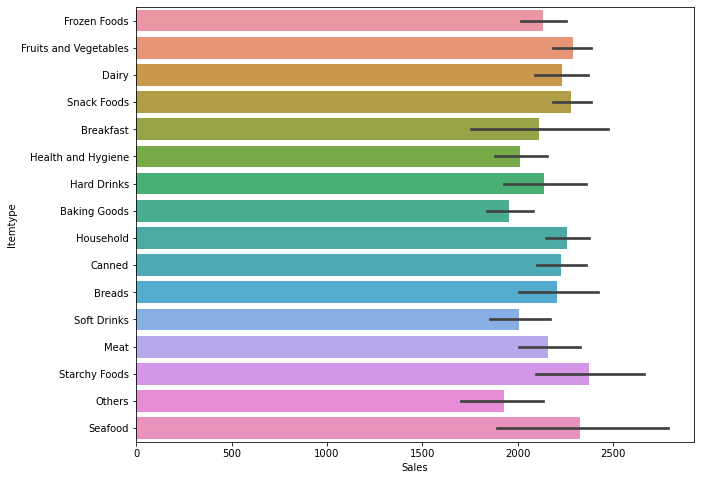

In [44]:
#Categorical and Numerical Graph 

plt.figure(figsize=(10,8))
sns.barplot(y='Itemtype', x='Sales',data=df)

* __The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.__

<AxesSubplot:xlabel='OutletEstablishmentYear'>

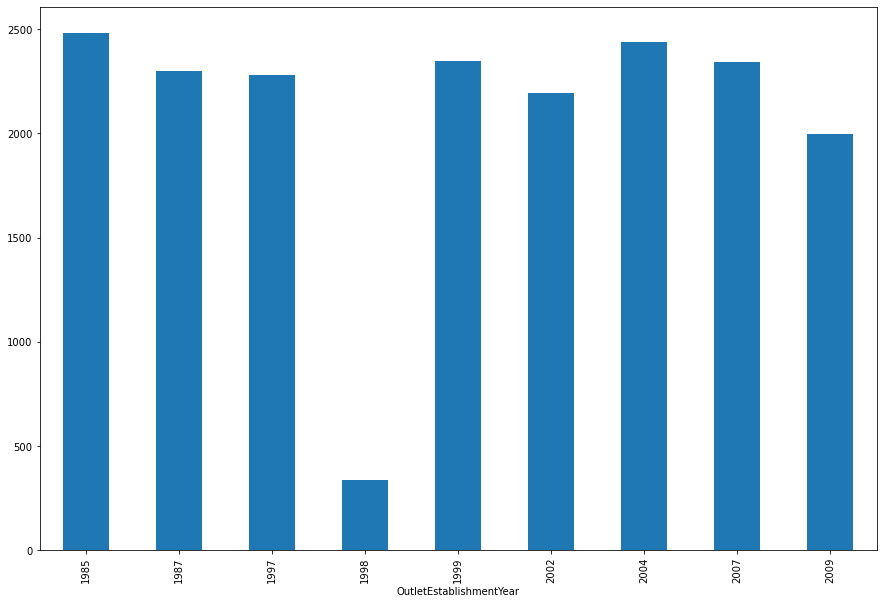

In [45]:
df.groupby('OutletEstablishmentYear')['Sales'].mean().plot.bar()

## Feature Engineering 

__Determine the years of operation of a store__

In [46]:
#Years:
df['Years'] = 2022 - df['OutletEstablishmentYear']
df.head()

,Item,Itemtype,Weight,FatContent,Visibility,MRP,Outlet,OutletEstablishmentYear,OutletSize,OutletCity,OutletType,Sales,Years
0,FDU28,Frozen Foods,19.2,Regular,0.094450,187.8214,OUT_017,2007,Medium,Tier 2,Supermarket Type1,4710.5350,15
1,FDY07,Fruits and Vegetables,11.8,Low Fat,0.070482,45.5402,OUT_049,1999,Medium,Tier 1,Supermarket Type1,1516.0266,23
2,FDA03,Dairy,18.5,Regular,0.045464,144.1102,OUT_046,1997,Small,Tier 1,Supermarket Type1,2187.1530,25
3,FDX32,Fruits and Vegetables,15.1,Regular,0.100014,145.4786,OUT_049,1999,Medium,Tier 1,Supermarket Type1,1589.2646,23
4,FDS46,Snack Foods,17.6,Regular,0.047257,119.6782,OUT_046,1997,Small,Tier 1,Supermarket Type1,2145.2076,25


In [47]:
df.Years.value_counts()

37    1463
35     932
25     930
18     930
23     930
20     929
13     928
15     926
24     555
Name: Years, dtype: int64

In [48]:
#Now we don't need OutletEstablishmentYear Feature anymore

df.drop("OutletEstablishmentYear", axis = 1, inplace = True)
df.head(2)

,Item,Itemtype,Weight,FatContent,Visibility,MRP,Outlet,OutletSize,OutletCity,OutletType,Sales,Years
0,FDU28,Frozen Foods,19.2,Regular,0.094450,187.8214,OUT_017,Medium,Tier 2,Supermarket Type1,4710.5350,15
1,FDY07,Fruits and Vegetables,11.8,Low Fat,0.070482,45.5402,OUT_049,Medium,Tier 1,Supermarket Type1,1516.0266,23


__Create a broad category of Type of Item__

In [49]:
df['ItemCategory'] = df['Item'].apply(lambda x: x[0:2])
df['ItemCategory'] = df['ItemCategory'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

In [50]:
df.ItemCategory.value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: ItemCategory, dtype: int64

In [51]:
#Now we don't need Item Feature anymore

df.drop("Item", axis = 1, inplace = True)
df.head(2)

,Itemtype,Weight,FatContent,Visibility,MRP,Outlet,OutletSize,OutletCity,OutletType,Sales,Years,ItemCategory
0,Frozen Foods,19.2,Regular,0.094450,187.8214,OUT_017,Medium,Tier 2,Supermarket Type1,4710.5350,15,Food
1,Fruits and Vegetables,11.8,Low Fat,0.070482,45.5402,OUT_049,Medium,Tier 1,Supermarket Type1,1516.0266,23,Food


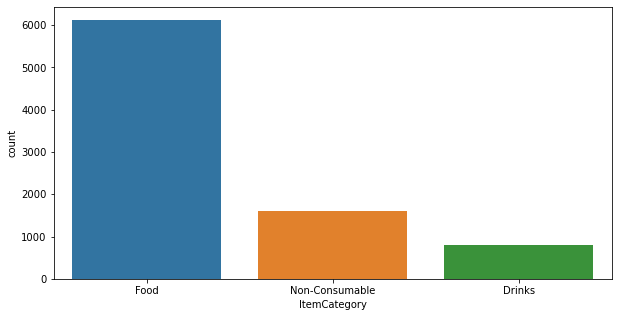

In [52]:
plt.figure(figsize = (10,5))
sns.countplot('ItemCategory', data = df)
plt.show()

__Modify categories of Item_Fat_Content__

In [53]:
#Mark non-consumables as separate category in low_fat:

df.loc[df['ItemCategory'] == "Non-Consumable", 'FatContent'] = "Non-Edible"
df['FatContent'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: FatContent, dtype: int64

### Lets now see how Sales is distributed

Text(0.5, 1.0, 'Sales Distribution')

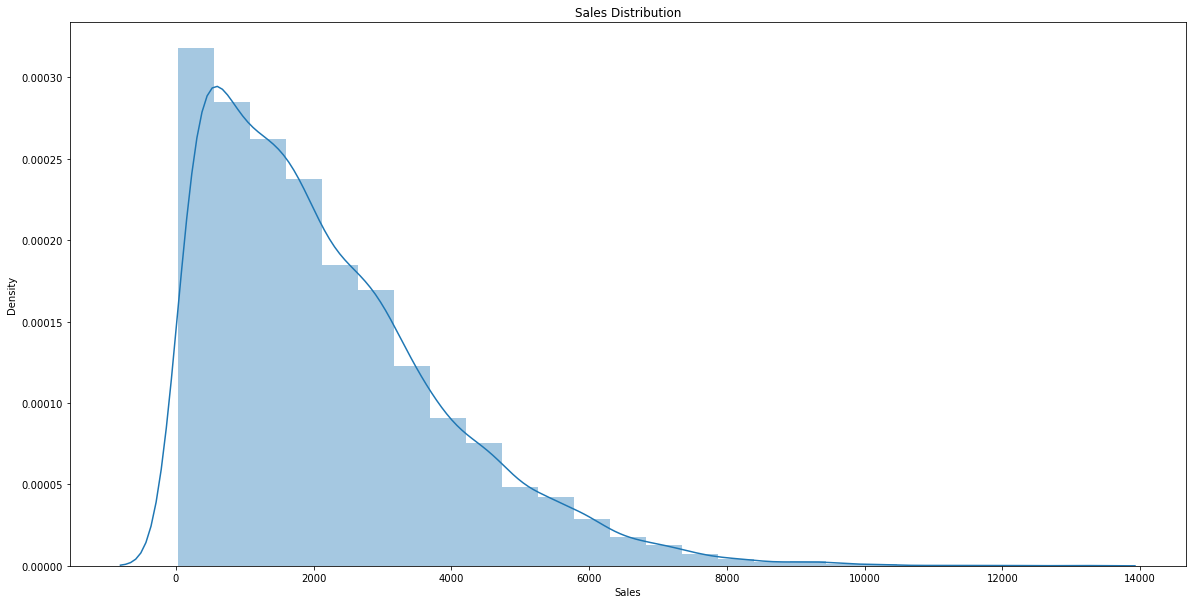

In [54]:
plt.figure(figsize=(20,10))
sns.distplot(df.Sales, bins = 25)
plt.title("Sales Distribution")

In [55]:
print("Skew is: ", df.Sales.skew())
print("Kurtosis: %.2f" % df.Sales.kurt())

Skew is:  1.1775306028542796
Kurtosis: 1.62


__We can see that our target variable is skewed towards the right. Therefore, we have to normalize it.__

### Numerical and One-Hot Coding of Categorical variables

In [56]:
catg = df.select_dtypes(include = [np.object])
catg.columns

Index(['Itemtype', 'FatContent', 'Outlet', 'OutletSize', 'OutletCity',
       'OutletType', 'ItemCategory'],
      dtype='object')

In [57]:
var_mod = ['Itemtype', 'FatContent', 'Outlet', 'OutletSize', 'OutletCity',
       'OutletType', 'ItemCategory']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [58]:
#One Hot Coding:
df= pd.get_dummies(df, columns=var_mod)

In [59]:
df.head()

,Weight,Visibility,MRP,Sales,Years,Itemtype_0,Itemtype_1,Itemtype_2,Itemtype_3,Itemtype_4,...,OutletCity_0,OutletCity_1,OutletCity_2,OutletType_0,OutletType_1,OutletType_2,OutletType_3,ItemCategory_0,ItemCategory_1,ItemCategory_2
0,19.2,0.094450,187.8214,4710.5350,15,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
1,11.8,0.070482,45.5402,1516.0266,23,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,18.5,0.045464,144.1102,2187.1530,25,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
3,15.1,0.100014,145.4786,1589.2646,23,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,17.6,0.047257,119.6782,2145.2076,25,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [60]:
corr = df.corr()

In [61]:
corr['Sales'].sort_values(ascending=False)

Sales             1.000000
MRP               0.567574
Outlet_5          0.311192
OutletType_3      0.311192
OutletType_1      0.108765
OutletSize_1      0.075154
OutletCity_1      0.058261
Outlet_6          0.052823
Years             0.049135
OutletCity_2      0.046376
Outlet_9          0.034264
Outlet_2          0.032610
ItemCategory_1    0.031905
Itemtype_6        0.025950
Outlet_1          0.024170
OutletSize_0      0.024170
Itemtype_13       0.022782
Outlet_8          0.019803
FatContent_2      0.018719
Itemtype_9        0.015701
Itemtype_15       0.015039
Weight            0.009693
Itemtype_4        0.008858
Itemtype_3        0.007387
Itemtype_12       0.007380
Itemtype_1        0.002332
Outlet_7          0.002274
Itemtype_10      -0.002995
Itemtype_7       -0.003956
Itemtype_2       -0.004656
FatContent_0     -0.009438
Itemtype_5       -0.009482
FatContent_1     -0.010861
ItemCategory_2   -0.010861
Itemtype_11      -0.021267
Itemtype_14      -0.024040
Itemtype_8       -0.025587
I

## MODEL BUILDING

In [62]:
# As we are going for a Regression Mode, first let remove all Categorical Features

df = df.select_dtypes(exclude='object')

In [63]:
# Taking out Dependent and Independent Variables/Features

X = df.drop("Sales", axis = 1)
features = X.columns

Y = df['Sales']

In [64]:
# Taking 20% data as validation set

X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.2, random_state=22)

In [65]:
temp_min = df.Sales.max()

### 1. LINEAR REGRESSION MODEL:

In [66]:
model = LinearRegression(normalize=True)

model.fit(X_train, Y_train)

#Prediction on Validation Dataset
Y_pred = model.predict(X_valid)

coef = pd.Series(model.coef_, features).sort_values()
intercept = model.intercept_

In [67]:
print("Coefficents = ", coef.to_list())
print("Intercept = ", intercept)

Coefficents =  [-1025685442738716.0, -547478143455607.9, -368382369032658.9, -344059864032069.8, -57594772827130.07, -6493272480274.713, -6493272480182.961, -298.77343348429423, 0.23238857513412953, 15.537152078522334, 14688948246636.12, 17151073678168.29, 29006015073351.98, 71476173099114.58, 79480435352459.77, 79480435352496.12, 79480435352533.69, 90189366959774.81, 90189366959797.03, 96007001377268.19, 109525373814694.28, 130540581174886.94, 162528067764528.78, 187668926283846.47, 201316716064818.0, 201316716064823.6, 201316716064879.94, 201316716064907.8, 201316716064918.53, 201316716064953.1, 201316716064965.78, 201316716064989.84, 201316716065009.62, 201316716065014.78, 201316716065019.75, 201316716065048.88, 201316716065147.94, 272612713322830.97, 273424294674869.2, 284242584372984.3, 387155798609164.94, 418310991180823.9, 472783555268037.8, 712253351266416.4, 1190907163061583.0, 1242232772364036.8]
Intercept =  -1480020848497591.5


In [68]:
#Model Score

print(model.score(X_train,Y_train))
print(model.score(X_valid,Y_valid))

0.568623970121239
0.5432435005260075


<AxesSubplot:title={'center':'Model Coefficients'}>

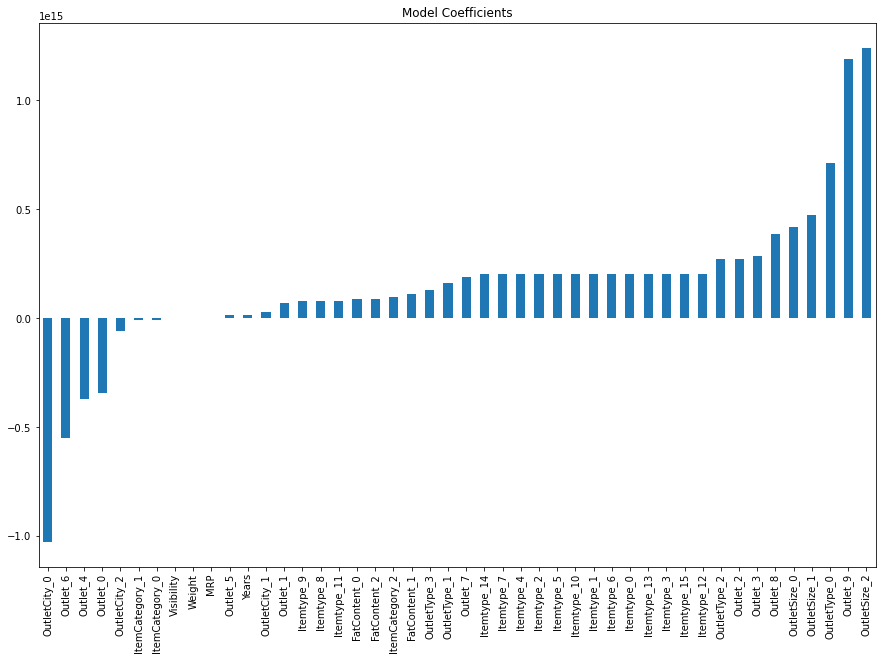

In [69]:
coef.plot(kind='bar', title='Model Coefficients')

In [70]:
print("MSE = ", mean_squared_error(Y_valid, Y_pred))
print("MAPE = ", mean_absolute_percentage_error(Y_valid, Y_pred))
print("MAE = ", mean_absolute_error(Y_valid, Y_pred))
print("R2 Sore = ", r2_score(Y_valid, Y_pred))
print("RMSE = ", math.sqrt(mean_squared_error(Y_valid, Y_pred)))
if temp_min > math.sqrt(mean_squared_error(Y_valid, Y_pred)):
    temp_min = math.sqrt(mean_squared_error(Y_valid, Y_pred))
    min_rmse_model = 'Linear Regression'
print("Normalized RMSE = ", math.sqrt(mean_squared_error(Y_valid, Y_pred))/(df.Sales.max() - df.Sales.min()))

MSE =  1411622.1696861254
MAPE =  1.078384983012732
MAE =  877.9665698533724
R2 Sore =  0.5432435005260075
RMSE =  1188.1170690155602
Normalized RMSE =  0.0910178235032759


### 2. DECISION TREE MODEL 

In [71]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

# predicting the validation set results
Y_pred = model.predict(X_valid)

In [72]:
print("MSE = ", mean_squared_error(Y_valid, Y_pred))
print("MAPE = ", mean_absolute_percentage_error(Y_valid, Y_pred))
print("MAE = ", mean_absolute_error(Y_valid, Y_pred))
print("R2 Sore = ", r2_score(Y_valid, Y_pred))
print("RMSE = ", math.sqrt(mean_squared_error(Y_valid, Y_pred)))
if temp_min > math.sqrt(mean_squared_error(Y_valid, Y_pred)):
    temp_min = math.sqrt(mean_squared_error(Y_valid, Y_pred))
    min_rmse_model = 'Decision Tree Regressor'
print("Normalized RMSE = ", math.sqrt(mean_squared_error(Y_valid, Y_pred))/(df.Sales.max() - df.Sales.min()))

MSE =  2539490.967456517
MAPE =  0.748962403465206
MAE =  1115.3044241642228
R2 Sore =  0.17830066029696023
RMSE =  1593.578039336799
Normalized RMSE =  0.12207888305420318


### 3. RANDOM FOREST REGRESSION 

In [73]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100 , n_jobs = -1)
model.fit(X_train, Y_train)

# predicting the validation set results
Y_pred = model.predict(X_valid)

In [74]:
print("MSE = ", mean_squared_error(Y_valid, Y_pred))
print("MAPE = ", mean_absolute_percentage_error(Y_valid, Y_pred))
print("MAE = ", mean_absolute_error(Y_valid, Y_pred))
print("R2 Sore = ", r2_score(Y_valid, Y_pred))
print("RMSE = ", math.sqrt(mean_squared_error(Y_valid, Y_pred)))
if temp_min > math.sqrt(mean_squared_error(Y_valid, Y_pred)):
    temp_min = math.sqrt(mean_squared_error(Y_valid, Y_pred))
    min_rmse_model = 'Random Forest Regressor'
print("Normalized RMSE = ", math.sqrt(mean_squared_error(Y_valid, Y_pred))/(df.Sales.max() - df.Sales.min()))

MSE =  1424706.4469122952
MAPE =  0.6036800307991028
MAE =  834.9130242756598
R2 Sore =  0.5390098402787321
RMSE =  1193.6106764403103
Normalized RMSE =  0.09143867108136557


### 4. SUPPORT VECTOR MACHINE (SVM)

In [75]:
from sklearn.svm import SVR

model = SVR()
model.fit(X_train, Y_train)

# predicting the validation set results
Y_pred = model.predict(X_valid)

In [76]:
print("MSE = ", mean_squared_error(Y_valid, Y_pred))
print("MAPE = ", mean_absolute_percentage_error(Y_valid, Y_pred))
print("MAE = ", mean_absolute_error(Y_valid, Y_pred))
print("R2 Sore = ", r2_score(Y_valid, Y_pred))
print("RMSE = ", math.sqrt(mean_squared_error(Y_valid, Y_pred)))
if temp_min > math.sqrt(mean_squared_error(Y_valid, Y_pred)):
    temp_min = math.sqrt(mean_squared_error(Y_valid, Y_pred))
    min_rmse_model = 'SUPPORT VECTOR MACHINE '
print("Normalized RMSE = ", math.sqrt(mean_squared_error(Y_valid, Y_pred))/(df.Sales.max() - df.Sales.min()))

MSE =  2541776.4031586004
MAPE =  1.5107494571400317
MAE =  1166.9876703198079
R2 Sore =  0.1775611652440533
RMSE =  1594.2949548808715
Normalized RMSE =  0.12213380364591829


### 5. AdaBoost Regressor

In [77]:
from sklearn.ensemble import AdaBoostRegressor

model= AdaBoostRegressor(n_estimators = 100)
model.fit(X_train, Y_train)

# predicting the validation set results
Y_pred = model.predict(X_valid)

In [78]:
print("MSE = ", mean_squared_error(Y_valid, Y_pred))
print("MAPE = ", mean_absolute_percentage_error(Y_valid, Y_pred))
print("MAE = ", mean_absolute_error(Y_valid, Y_pred))
print("R2 Sore = ", r2_score(Y_valid, Y_pred))
print("RMSE = ", math.sqrt(mean_squared_error(Y_valid, Y_pred)))
if temp_min > math.sqrt(mean_squared_error(Y_valid, Y_pred)):
    temp_min = math.sqrt(mean_squared_error(Y_valid, Y_pred))
    min_rmse_model = 'Ada Boost Regressor'
print("Normalized RMSE = ", math.sqrt(mean_squared_error(Y_valid, Y_pred))/(df.Sales.max() - df.Sales.min()))

MSE =  1870626.3589407958
MAPE =  1.6596141059144593
MAE =  1100.3045466881026
R2 Sore =  0.39472419328497865
RMSE =  1367.7084334538542
Normalized RMSE =  0.10477573973681759


### 6. XgBoost Regressor

In [79]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, Y_train)

# predicting the validation set results
Y_pred = model.predict(X_valid)

In [80]:
print("MSE = ", mean_squared_error(Y_valid, Y_pred))
print("MAPE = ", mean_absolute_percentage_error(Y_valid, Y_pred))
print("MAE = ", mean_absolute_error(Y_valid, Y_pred))
print("R2 Sore = ", r2_score(Y_valid, Y_pred))
print("RMSE = ", math.sqrt(mean_squared_error(Y_valid, Y_pred)))
if temp_min > math.sqrt(mean_squared_error(Y_valid, Y_pred)):
    temp_min = math.sqrt(mean_squared_error(Y_valid, Y_pred))
    min_rmse_model = 'Gradient Boosting Regressor'
print("Normalized RMSE = ", math.sqrt(mean_squared_error(Y_valid, Y_pred))/(df.Sales.max() - df.Sales.min()))

MSE =  1317664.2814529398
MAPE =  0.5988382471771144
MAE =  804.2986501550074
R2 Sore =  0.5736453155788984
RMSE =  1147.895588219129
Normalized RMSE =  0.08793658535289457


# BEST MODEL

In [81]:
min_rmse_model

'Gradient Boosting Regressor'